 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

## Assumptions and limitations

1. Limitation: Only dates that overlap between portfolios will be compared
2. Assumption: There are no significant anomalous price impacting events during the time window such as share split, trading halt

## 0. Import Required Libraries

In [1]:
# Initial imports
import pandas as pd # daataframe manipulation
import numpy as np # calc and numeric manipulatino
import datetime as dt # date and tim 
from pathlib import Path # setting the path for file manipulation
import datetime 

pd.options.display.float_format = '{:.6f}'.format # float format to 6 decimal places

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## A. Whale Returns

Read the Whale Portfolio daily returns and clean the data.

### 1. import whale csv and set index to date

In [2]:
df_wr = pd.read_csv('Resources/whale_returns.csv', index_col="Date")

### 2. Inspect imported data

In [3]:
# look at colums and value head
df_wr.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,nan,nan,nan,nan
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213


In [4]:
# look at last few values
df_wr.tail(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [5]:
# check dimensions of df
df_wr.shape

(1060, 4)

In [6]:
# get index datatype - for later merging
df_wr.index.dtype

dtype('O')

In [7]:
# get datatypes of all values
df_wr.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

### 3. Count and drop any null values

In [8]:
# Count nulls
df_wr.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls 
df_wr.dropna(inplace=True)

In [10]:
# Count nulls -again to ensure they're removed
df_wr.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [11]:
df_wr.count() #double check all values are equal in length

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

### 4. Sort the index to ensure the correct date order for calculations

In [12]:
df_wr.sort_index(inplace=True)

### 5. Rename columns - shorten and make consistent with other tables

In [13]:
# change columns to be consistent and informative
df_wr.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [14]:
df_wr.columns = ['Whale_Soros_Fund_Daily_Returns', 'Whale_Paulson_Daily_Returns',
       'Whale_Tiger_Daily_Returns', 'Whale_Berekshire_Daily_Returns']

### 6. Create copy dataframe with new column for cumulative returns

In [15]:
# copy the dataframe to store cumprod in a new view
df_wr_cumulative = df_wr.copy()

In [16]:
# create a new column in new df for each cumulative daily return using the cumprod function
df_wr_cumulative['Whale_Soros_Fund_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Soros_Fund_Daily_Returns']).cumprod()

In [17]:
df_wr_cumulative['Whale_Paulson_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Paulson_Daily_Returns']).cumprod()

In [18]:
df_wr_cumulative['Whale_Tiger_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Tiger_Daily_Returns']).cumprod()

In [19]:
df_wr_cumulative['Whale_Berekshire_Daily_CumReturns'] = (1 + df_wr_cumulative['Whale_Berekshire_Daily_Returns']).cumprod()

In [20]:
df_wr_cumulative.head() # check result is consistent against original column ie adds up

,Whale_Soros_Fund_Daily_Returns,Whale_Paulson_Daily_Returns,Whale_Tiger_Daily_Returns,Whale_Berekshire_Daily_Returns,Whale_Soros_Fund_Daily_CumReturns,Whale_Paulson_Daily_CumReturns,Whale_Tiger_Daily_CumReturns,Whale_Berekshire_Daily_CumReturns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.998734,0.995019,0.999504,0.993431
2015-03-04,0.002230,0.003241,-0.002534,0.004213,1.000962,0.998245,0.996972,0.997617
2015-03-05,0.004016,0.004076,0.002355,0.006726,1.004981,1.002314,0.999319,1.004327
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.997617,1.002951,0.996633,0.989534


In [21]:
# drop returns columns from cumulative df

In [22]:
df_wr_cumulative.columns

Index(['Whale_Soros_Fund_Daily_Returns', 'Whale_Paulson_Daily_Returns',
       'Whale_Tiger_Daily_Returns', 'Whale_Berekshire_Daily_Returns',
       'Whale_Soros_Fund_Daily_CumReturns', 'Whale_Paulson_Daily_CumReturns',
       'Whale_Tiger_Daily_CumReturns', 'Whale_Berekshire_Daily_CumReturns'],
      dtype='object')

In [23]:
df_wr_cumulative = df_wr_cumulative[['Whale_Soros_Fund_Daily_CumReturns', 'Whale_Paulson_Daily_CumReturns','Whale_Tiger_Daily_CumReturns', 'Whale_Berekshire_Daily_CumReturns']]

In [24]:
df_wr_cumulative.head()

,Whale_Soros_Fund_Daily_CumReturns,Whale_Paulson_Daily_CumReturns,Whale_Tiger_Daily_CumReturns,Whale_Berekshire_Daily_CumReturns
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


### 7. Look at high level stats & plot for whale portfolios

In [25]:
df_wr.describe(include='all') # basic stats for daily whale returns

,Whale_Soros_Fund_Daily_Returns,Whale_Paulson_Daily_Returns,Whale_Tiger_Daily_Returns,Whale_Berekshire_Daily_Returns
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [26]:
df_wr_cumulative.describe(include='all') # basic stats for daily cumulative whale returns

,Whale_Soros_Fund_Daily_CumReturns,Whale_Paulson_Daily_CumReturns,Whale_Tiger_Daily_CumReturns,Whale_Berekshire_Daily_CumReturns
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,1.049883,0.876058,1.146284,1.159732
std,0.073730,0.088385,0.151043,0.242778
min,0.881701,0.691364,0.822799,0.776232
25%,0.989084,0.792238,1.016063,0.935323
50%,1.040493,0.864336,1.138139,1.057278
75%,1.119133,0.949932,1.284809,1.364337
max,1.204573,1.050682,1.428464,1.638119


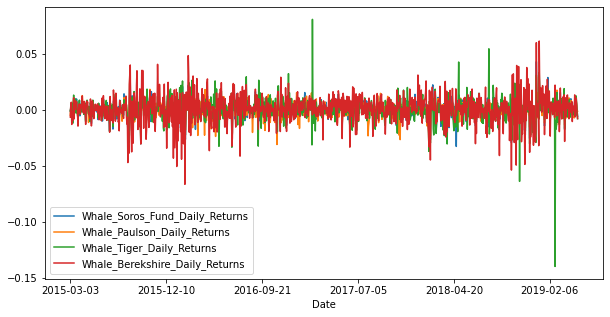

In [27]:
# plot daily returns - whales
df_wr.plot(figsize=(10,5))

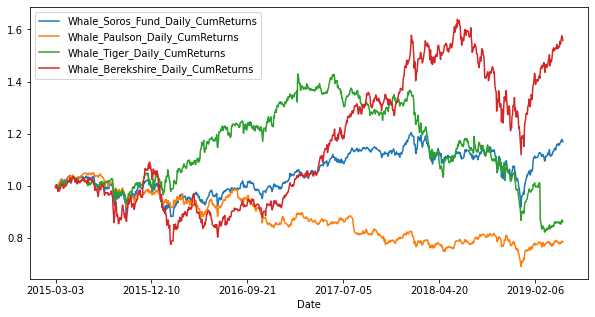

In [28]:
# Plot cumulative returns
df_wr_cumulative.plot(figsize=(10,5))

#### The data looks consistent and there are no obvious data errors identified. 

#### Initial high level observations of standalone daily returns data for whale portfolio:  At initial glance, the mean daily return indicates that Berkshire portfolio performed best (mean daily returns of 0.000501, mean cumulative daily returns 1.159732), while Paulson worst (-0.000203). The standard deviation indicates highest risk for Berkshire (0.012831 STD), while lowest risk/volatility is Paulson (std 0.006977)
#### A more thorough analysis will be done in the following analysis section, so no conclusions are drawn yet. 
#### By looking at the cumulative chart, it is evident that all portfolios were vulnerable to a loss at the same tim around 2019-02-16, but that Berkshir was able to increas the most over time and climb the steepest after the downturn

## B. Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

### 1. import algo csv and set index to date

In [29]:
# Reading algorithmic returns
df_ar = pd.read_csv('Resources/algo_returns.csv', index_col='Date')

### 2. Inspect resulting dataframe and contained data

In [30]:
# look at colums and value first 3 rows
df_ar.head(3)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,nan
2014-05-29,0.003978,nan
2014-05-30,0.004464,nan


In [31]:
# look at colums and value last 3 rows
df_ar.tail(3)

,Algo 1,Algo 2
Date,,
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [32]:
# get dimensions of df
df_ar.shape

(1241, 2)

In [33]:
# get index datatype - for later merging
df_ar.index.dtype

dtype('O')

In [34]:
# get datatypes
df_ar.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

### 3. Count and remove null values

In [35]:
# Count nulls
df_ar.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [36]:
# Drop nulls
df_ar.dropna(inplace=True)

In [37]:
# Count nulls -again to ensure that nulls actually are removed
df_ar.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [38]:
df_ar.count()

Algo 1    1235
Algo 2    1235
dtype: int64

### 4. Sort index to ensure correct date order for calculations

In [39]:
df_ar.sort_index(inplace=True)

### 5. Rename columns to be consistent with future merge

In [40]:
df_ar.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

In [41]:
df_ar.columns = ['Algo1_Daily_Returns', 'Algo2_Daily_Returns']

### 6. Create new column in a copy df for cumulative returns per Algo daily return

In [42]:
# create a df copy to store cumulative data
df_ar_cumulative = df_ar.copy() 

In [43]:
# use cumprod to get the daily cumulative returns for each of the algos 1 and 2
df_ar_cumulative['Algo1_Daily_CumReturns'] = (1 + df_ar_cumulative['Algo1_Daily_Returns']).cumprod()

In [44]:
df_ar_cumulative['Algo2_Daily_CumReturns'] = (1 + df_ar_cumulative['Algo2_Daily_Returns']).cumprod()

In [45]:
# check the result is consistent with the daily returns for first few columns
df_ar_cumulative.head(10)

,Algo1_Daily_Returns,Algo2_Daily_Returns,Algo1_Daily_CumReturns,Algo2_Daily_CumReturns
Date,,,,
2014-06-05,0.004062,0.013285,1.004062,1.013285
2014-06-06,0.001857,0.008284,1.005927,1.021679
2014-06-09,-0.005012,0.005668,1.000885,1.027470
2014-06-10,0.004406,-0.000735,1.005295,1.026714
2014-06-11,0.004760,-0.003761,1.010081,1.022852
2014-06-12,-0.000028,-0.003841,1.010052,1.018923
2014-06-13,0.001917,-0.000814,1.011989,1.018094
2014-06-16,0.001084,0.001831,1.013086,1.019958
2014-06-17,0.000922,0.006870,1.014020,1.026964


In [46]:
# drop columns that are not required

In [47]:
df_ar_cumulative.columns # get the columns

Index(['Algo1_Daily_Returns', 'Algo2_Daily_Returns', 'Algo1_Daily_CumReturns',
       'Algo2_Daily_CumReturns'],
      dtype='object')

In [48]:
df_ar_cumulative = df_ar_cumulative[['Algo1_Daily_CumReturns','Algo2_Daily_CumReturns']]

In [49]:
# check result - first few lines
df_ar_cumulative.head(10)

,Algo1_Daily_CumReturns,Algo2_Daily_CumReturns
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852
2014-06-12,1.010052,1.018923
2014-06-13,1.011989,1.018094
2014-06-16,1.013086,1.019958
2014-06-17,1.014020,1.026964


### 7. Look at high level stats & plot for algo portfolios

In [50]:
df_ar.describe(include='all') # stats for daily returns

,Algo1_Daily_Returns,Algo2_Daily_Returns
count,1235.000000,1235.000000
mean,0.000654,0.000341
std,0.007988,0.008466
min,-0.030951,-0.036937
25%,-0.003252,-0.003733
50%,0.000094,0.000581
75%,0.003901,0.005194
max,0.098246,0.083734


In [51]:
df_ar_cumulative.describe(include='all') # stats for daily cumulative returns

,Algo1_Daily_CumReturns,Algo2_Daily_CumReturns
count,1235.000000,1235.000000
mean,1.469760,1.228900
std,0.294720,0.159139
min,0.962939,0.912747
25%,1.127517,1.097729
50%,1.545455,1.181145
75%,1.611602,1.370561
max,2.195434,1.526028


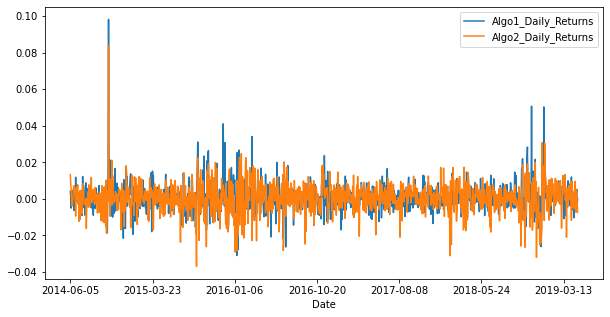

In [52]:
# plot daily returns  - algos
df_ar.plot(figsize=(10,5))

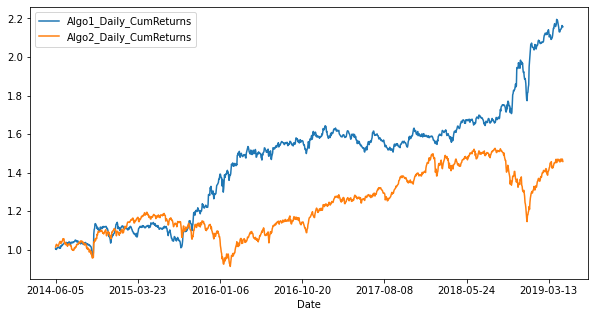

In [53]:
# plot daily cumulative returns  - algos
df_ar_cumulative.plot(figsize=(10,5))

#### The data looks consistent and there are no obvious errors identified. 

#### Initial observations of standalone daily returns data for Algo 1 vs Algo 2:  mean daily return indicates that Algo 1 (mean daily return 0.000654) performs slightly better than Algo 2 (mean daily return 0.000341), which is alo evident in the cumulative daily returns plot. When looking at just daily returns, Algo 2 is more risky, but when looking at cumulative returns, Algo 1 is more risky (ie higher standard deviation). 

## C. S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 
Note: this contains daily closing and not returns - needs to be converted

### 1. Import S&P csv daily closing price (not returns)

In [54]:
# Reading S&P TSX 60 Closing Prices

df_sr = pd.read_csv('Resources/sp_tsx_history.csv')

### 2. Inspect columns of dataframe

In [55]:
# look at colums and value head
df_sr.head(3)

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"


In [56]:
# look at tail values
df_sr.tail(3)

,Date,Close
1815,24-Dec-2019,"$17,180.15"
1816,27-Dec-2019,"$17,168.21"
1817,30-Dec-2019,"$17,098.56"


#### Note from dataframe inspection: 
#### 1. date column was not immediated converted because it is in
#### a different format to the other csv files and 
#### needs to bee converted to consistent format first
#### 2. Close cannot be explicitly converted to float as it has
#### dollar and commas. 
#### 3. A new column for returns will need to be created from 
#### return calculations. 

In [57]:
# check dimension of df
df_sr.shape

(1818, 2)

In [58]:
# Check Data Types
df_sr.dtypes

Date     object
Close    object
dtype: object

### 3. Convert the date into a consistent format with other tables

In [59]:
df_sr['Date']= pd.to_datetime(df_sr['Date']).dt.strftime('%Y-%m-%d')
#df_sr['Date']=  pd.to_datetime(df_sr['Date'], format='%Y-%m-%d')

### 4. Convert th data to index and check format and data type

In [60]:
# set date as index
df_sr.set_index('Date', inplace=True)

In [61]:
df_sr.head(2)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"


In [62]:
df_sr.index.dtype

dtype('O')

### 5. Check for null values

In [63]:
# Count nulls - none observed
df_ar.isna().sum()

Algo1_Daily_Returns    0
Algo2_Daily_Returns    0
dtype: int64

### 6. Convert daily closing price to float (from string)

In [64]:
# Change the Closing column to b float type
df_sr['Close']= df_sr['Close'].str.replace('$','')
df_sr['Close']= df_sr['Close'].str.replace(',','')
df_sr['Close']= df_sr['Close'].astype(float)

In [65]:
# Check Data Types
df_sr.dtypes

Close    float64
dtype: object

In [66]:
# test 
df_sr.iloc[0]

Close   12370.190000
Name: 2012-10-01, dtype: float64

In [67]:
# check null values
df_sr.isna().sum()

Close    0
dtype: int64

In [68]:
df_sr.count()

Close    1818
dtype: int64

### 7. Sort the index for calculations of returns

In [69]:
# sort_index 
df_sr.sort_index(inplace=True)

In [70]:
df_sr.head(2)

,Close
Date,
2012-10-01,12370.190000
2012-10-02,12391.230000


### 8. Calculate daily returns and store in new column

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

The daily return is the (current closing price minus the previous day closing price) all divided by the previous day closing price. The initial value has no daily return as there is no prior period to compare it with. 

Here the calculation uses the python shift function 

In [71]:

df_sr['SnP_TSX_60_Returns'] = (df_sr['Close'] - df_sr['Close'].shift(1))/ df_sr['Close'].shift(1)

In [72]:
df_sr.head(10)

,Close,SnP_TSX_60_Returns
Date,,
2012-10-01,12370.190000,nan
2012-10-02,12391.230000,0.001701
2012-10-03,12359.470000,-0.002563
2012-10-04,12447.680000,0.007137
2012-10-05,12418.990000,-0.002305
2012-10-09,12273.570000,-0.011709
2012-10-10,12212.420000,-0.004982
2012-10-11,12233.950000,0.001763
2012-10-12,12202.040000,-0.002608


### 9. Cross check conversion to daily returns against alternative method - pct_change function

In [73]:
df_sr['SnP_TSX_60_Returns'] = df_sr['Close'].pct_change()
df_sr.head(10)

,Close,SnP_TSX_60_Returns
Date,,
2012-10-01,12370.190000,nan
2012-10-02,12391.230000,0.001701
2012-10-03,12359.470000,-0.002563
2012-10-04,12447.680000,0.007137
2012-10-05,12418.990000,-0.002305
2012-10-09,12273.570000,-0.011709
2012-10-10,12212.420000,-0.004982
2012-10-11,12233.950000,0.001763
2012-10-12,12202.040000,-0.002608


#### Methods cross check - looks good - continue

In [74]:
# check for null - first row would have null
df_sr.isna().sum()

Close                 0
SnP_TSX_60_Returns    1
dtype: int64

In [75]:
# Drop nulls - first row
df_sr.dropna(inplace=True)

In [76]:
# Rename `Close` Column to be specific to this portfolio.
df_sr.columns

Index(['Close', 'SnP_TSX_60_Returns'], dtype='object')

In [87]:
df_sr.head()

,SnP_TSX_60_Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


### 10. Drop original Closing column - not needed for comparison

In [77]:
df_sr = df_sr[['SnP_TSX_60_Returns']] 

In [78]:
df_sr.columns

Index(['SnP_TSX_60_Returns'], dtype='object')

### 11. Create new column in a copy df for cumulative returns per daily return S&P TSX 60

In [79]:
df_sr_cumulative = df_sr.copy()

In [90]:
# use cumprod to get the daily cumulative returns for each of the algos 1 and 2
df_sr_cumulative['SnP_TSX_60_CumReturns'] = (1+df_sr_cumulative['SnP_TSX_60_Returns']).cumprod()

In [91]:
# visually check first 10 rows to ensure that results make sense
df_sr_cumulative.head(10)

,SnP_TSX_60_Returns,SnP_TSX_60_CumReturns
Date,,
2012-10-02,0.001701,1.001701
2012-10-03,-0.002563,0.999133
2012-10-04,0.007137,1.006264
2012-10-05,-0.002305,1.003945
2012-10-09,-0.011709,0.992189
2012-10-10,-0.004982,0.987246
2012-10-11,0.001763,0.988986
2012-10-12,-0.002608,0.986407
2012-10-15,0.002288,0.988664


In [92]:
# drop daily returns column from cumulative df
df_sr_cumulative = df_sr_cumulative[['SnP_TSX_60_CumReturns']]

In [93]:
df_sr_cumulative.head()

,SnP_TSX_60_CumReturns
Date,
2012-10-02,1.001701
2012-10-03,0.999133
2012-10-04,1.006264
2012-10-05,1.003945
2012-10-09,0.992189


### 12. Look at high level stats & plot for algo portfolios

In [94]:
df_sr.describe()

,SnP_TSX_60_Returns
count,1817.000000
mean,0.000200
std,0.006637
min,-0.031241
25%,-0.003156
50%,0.000653
75%,0.004115
max,0.029389


In [95]:
df_sr_cumulative.describe()

,SnP_TSX_60_CumReturns
count,1817.000000
mean,1.186681
std,0.107322
min,0.954826
25%,1.101159
50%,1.206455
75%,1.263479
max,1.388835


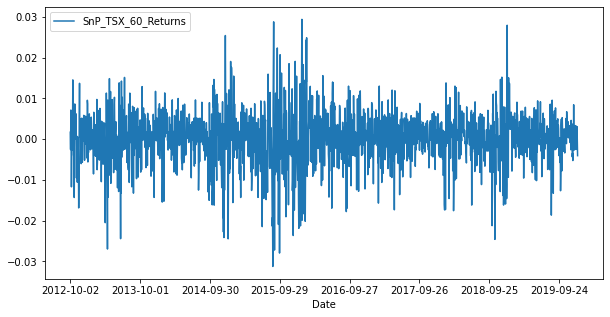

In [98]:
# plot daily returns  - S&P TSX 60
df_sr.plot(figsize=(10,5))

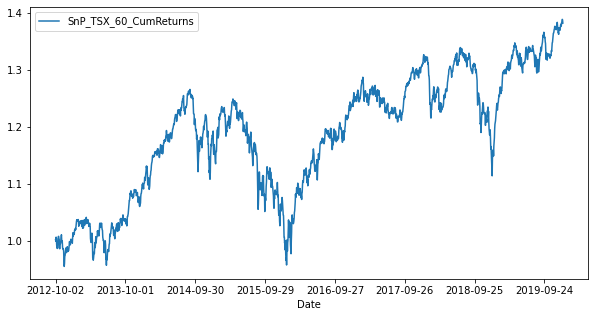

In [99]:
# plot daily returns  - S&P TSX 60
df_sr_cumulative.plot(figsize=(10,5))

## D. Combine Whale, Algorithmic, and S&P TSX 60 Returns

### 1. Merge daily returns dataframes from all portfolios

In [82]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
merged_analysis_df_tmp = pd.concat([df_wr, df_ar ], axis="columns", join="inner")

In [83]:
merged_analysis_df_tmp.head(3)

,Whale_Soros_Fund_Daily_Returns,Whale_Paulson_Daily_Returns,Whale_Tiger_Daily_Returns,Whale_Berekshire_Daily_Returns,Algo1_Daily_Returns,Algo2_Daily_Returns
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323


In [84]:
# Use the `concat` function to combine the two DataFrames by matching indexes
merged_daily_returns_df = pd.concat([merged_analysis_df_tmp, df_sr ], axis="columns", join="inner")

In [85]:
merged_daily_returns_df.head(3)

,Whale_Soros_Fund_Daily_Returns,Whale_Paulson_Daily_Returns,Whale_Tiger_Daily_Returns,Whale_Berekshire_Daily_Returns,Algo1_Daily_Returns,Algo2_Daily_Returns,SnP_TSX_60_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns

### 1. Plot of daily returns

Text(0, 0.5, 'Date')

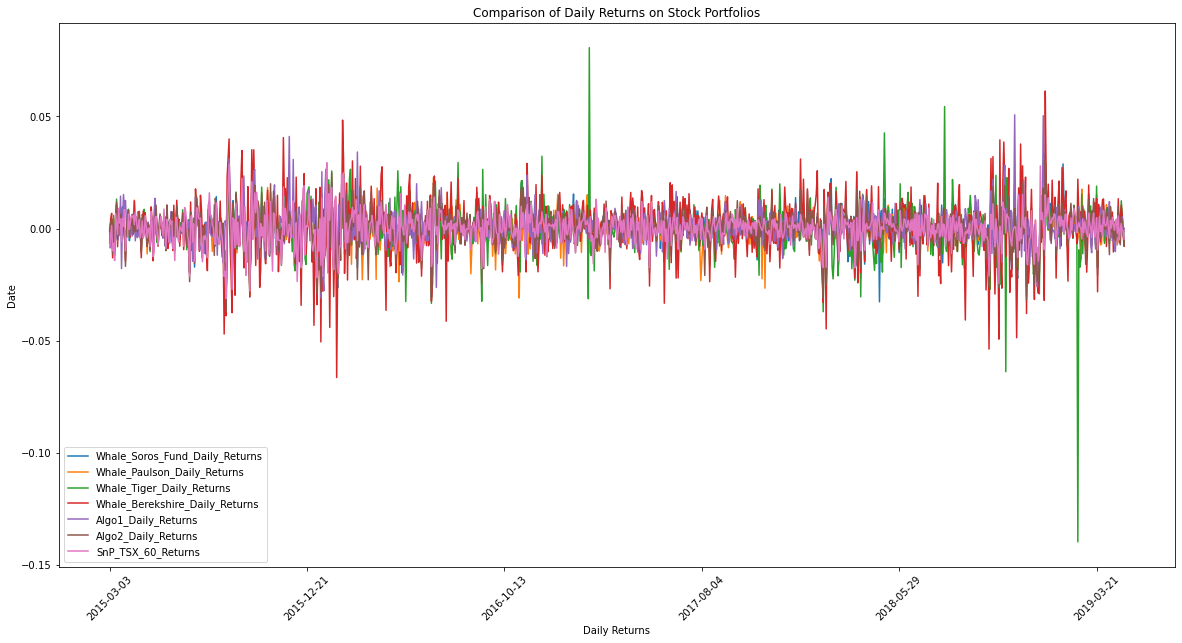

In [100]:
# Plot daily returns of all portfolios
drp = merged_daily_returns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Returns on Stock Portfolios')
drp.set_xlabel("Daily Returns")
drp.set_ylabel("Date")


#### Calculate and Plot cumulative returns.

### 2. Merge Cumulative Daily Returns

Calculations were already done in the first section

In [103]:
# Use the `concat` function to combine the two DataFrames by matching indexes
merged_cumulative__df_tmp = pd.concat([df_wr_cumulative, df_ar_cumulative ], axis="columns", join="inner")

In [104]:
merged_daily_cumreturns_df = pd.concat([merged_cumulative__df_tmp, df_sr_cumulative ], axis="columns", join="inner")

In [105]:
merged_daily_cumreturns_df.head()

,Whale_Soros_Fund_Daily_CumReturns,Whale_Paulson_Daily_CumReturns,Whale_Tiger_Daily_CumReturns,Whale_Berekshire_Daily_CumReturns,Algo1_Daily_CumReturns,Algo2_Daily_CumReturns,SnP_TSX_60_CumReturns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,1.104979,1.156329,1.223413
2015-03-04,1.000962,0.998245,0.996972,0.997617,1.095489,1.159122,1.219289
2015-03-05,1.004981,1.002314,0.999319,1.004327,1.094442,1.164134,1.220928
2015-03-06,0.997037,0.998731,0.990844,0.991172,1.089018,1.150792,1.208753
2015-03-09,0.997617,1.002951,0.996633,0.989534,1.083086,1.152292,1.200830


Text(0, 0.5, 'Date')

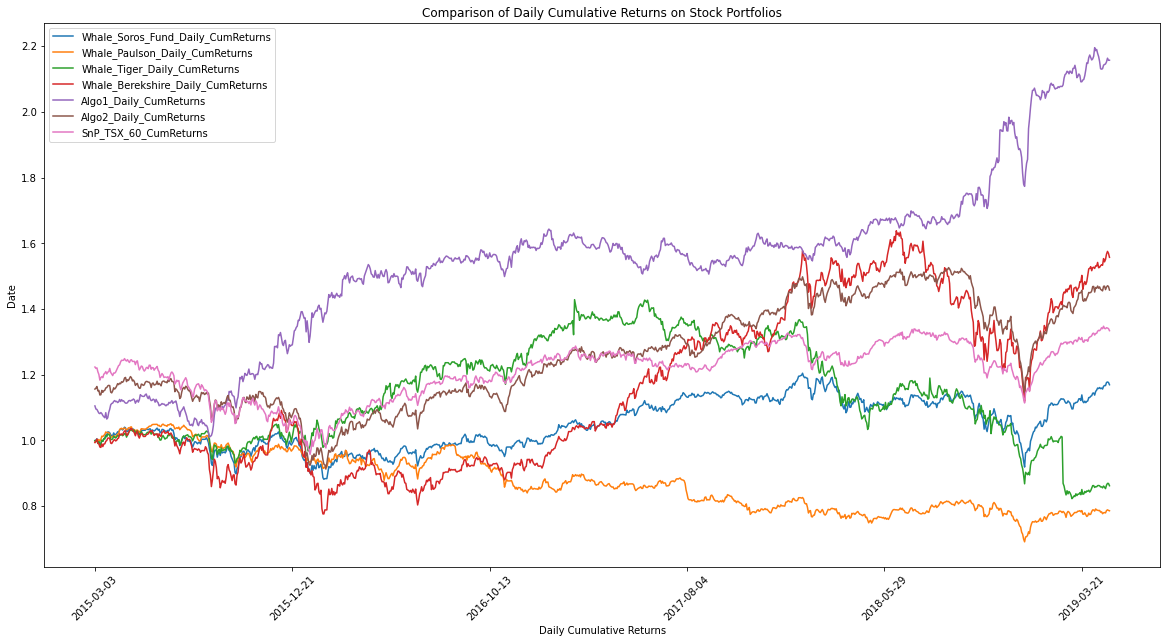

In [107]:
# Plot cumulative returns

dcrp = merged_daily_cumreturns_df.plot(figsize=(20,10), rot=45, title='Comparison of Daily Cumulative Returns on Stock Portfolios')
dcrp.set_xlabel("Daily Cumulative Returns")
dcrp.set_ylabel("Date")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


## [[TODO - is this over the daily returns or cumulative returns??]]

Text(17.200000000000017, 0.5, 'Date')

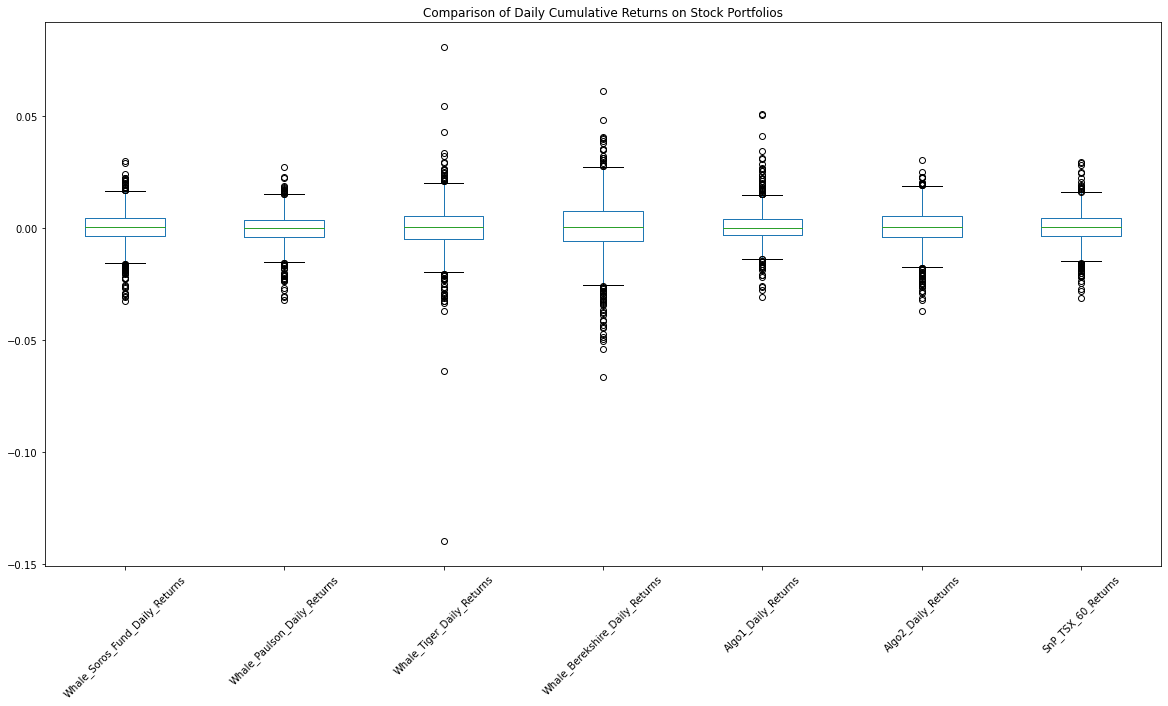

In [124]:
# Box plot to visually show risk
mcrb = merged_daily_returns_df.plot.box(figsize=(20,10), rot=45, title='Boxplot Comparison of Daily Returns on Stock Portfolios')
dcrp.set_xlabel("Daily Returns")
dcrp.set_ylabel("Date")

### Calculate Standard Deviations

In [112]:
# Daily standard deviation of daily returns sorted in ascending ordeer
daily_std = merged_daily_returns_df.std().sort_values()
daily_std

Whale_Paulson_Daily_Returns      0.006982
SnP_TSX_60_Returns               0.007034
Algo1_Daily_Returns              0.007589
Whale_Soros_Fund_Daily_Returns   0.007828
Algo2_Daily_Returns              0.008326
Whale_Tiger_Daily_Returns        0.010883
Whale_Berekshire_Daily_Returns   0.012826
dtype: float64

Text(17.200000000000017, 0.5, 'Portfolio')

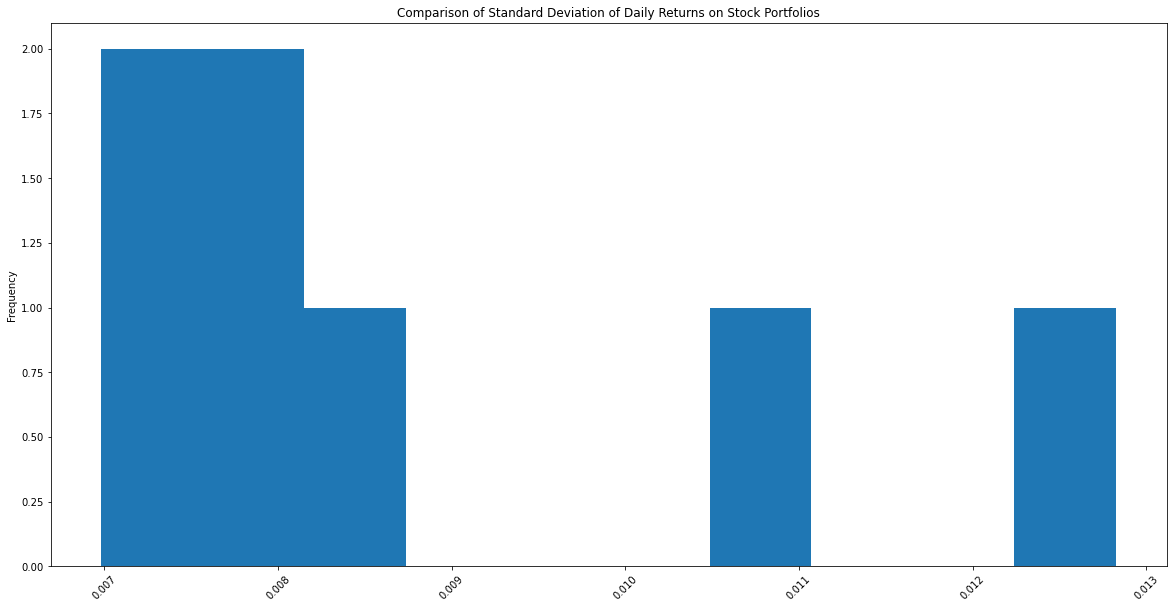

In [127]:
mcrb = daily_std.plot.hist(figsize=(20,10), rot=45, title='Comparison of Standard Deviation of Daily Returns on Stock Portfolios')
dcrp.set_xlabel("Returns Standard Deviation")
dcrp.set_ylabel("Portfolio")

# [[todo ]] annualized_std.plot.hist(stacked=True)

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60


By sorting in ordere of srd deviation on daily return above, the riskier portfolios than S&P TSX 60 are all eexcept Whale Paulson portfolio, as all others have higher std deviation than S&P TSX 60

### Calculate the Annualized Standard Deviation

In [125]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

Whale_Paulson_Daily_Returns      0.110841
SnP_TSX_60_Returns               0.111664
Algo1_Daily_Returns              0.120470
Whale_Soros_Fund_Daily_Returns   0.124259
Algo2_Daily_Returns              0.132177
Whale_Tiger_Daily_Returns        0.172759
Whale_Berekshire_Daily_Returns   0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [128]:
# Annualized Sharpe Ratios
sharpe_ratios = (merged_daily_returns_df.mean() * 252) / (merged_daily_returns_df.std() * np.sqrt(252))
sharpe_ratios

Whale_Soros_Fund_Daily_Returns    0.286709
Whale_Paulson_Daily_Returns      -0.547594
Whale_Tiger_Daily_Returns        -0.144455
Whale_Berekshire_Daily_Returns    0.467045
Algo1_Daily_Returns               1.491514
Algo2_Daily_Returns               0.396817
SnP_TSX_60_Returns                0.195550
dtype: float64

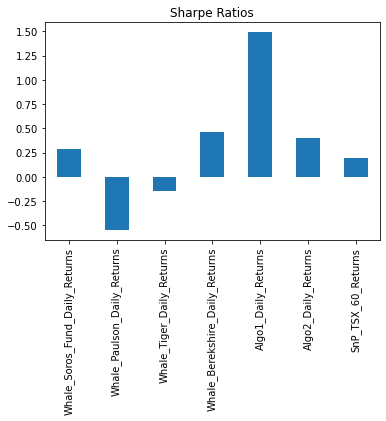

In [129]:
# Visualize the sharpe ratios as a bar plot
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

### References

Shift function in pandas - 
https://stackoverflow.com/questions/20000726/calculate-daily-returns-with-pandas-dataframe

Conditional line color -  
https://stackoverflow.com/questions/31590184/plot-multicolored-line-based-on-conditional-in-python

https://stackoverflow.com/questions/40803570/python-matplotlib-scatter-plot-specify-color-points-depending-on-conditions/40804861

https://stackoverflow.com/questions/42453649/conditional-color-with-matplotlib-scatter

https://stackoverflow.com/questions/3832809/how-to-change-the-color-of-a-single-bar-if-condition-is-true-matplotlib

https://stackoverflow.com/questions/56779975/conditional-coloring-in-matplotlib-using-numpys-where

PEP 8 - Standards - 

